In [115]:
"""
Name: Potential-Performance-Predictor
Project Group Number: 19
"""

'\nName: Potential-Performance-Predictor\nProject Group Number: 19\n'

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# we will also be using the PCA library from scikit learn for this exercise
from sklearn.decomposition import PCA

# we will use the StandardScaler method to z-score normalize our data
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

In [117]:
# First, let us load datasets to use for KMeans and Hierarchical Clustering
data = pd.read_csv('Dataset/HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [118]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [120]:
print(data.columns.values)

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


In [121]:
data.isna().head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [122]:
print("*******The Employee DataSet*******")
print(data.isna().sum())

*******The Employee DataSet*******
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
Years

In [123]:
df = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','OverTime','PercentSalaryHike','PerformanceRating','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','Attrition'], axis=1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,Female,94,2,Sales Executive,Single,5993,19479,8,1,0,8,4
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Male,61,2,Research Scientist,Married,5130,24907,1,4,1,10,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,Male,92,1,Laboratory Technician,Single,2090,2396,6,2,0,7,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Female,56,1,Research Scientist,Married,2909,23159,1,3,0,8,7
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,Male,40,1,Laboratory Technician,Married,3468,16632,9,4,1,6,2


In [124]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df.DailyRate = norm_func(df.DailyRate)
df.DistanceFromHome = norm_func(df.DistanceFromHome)
df.HourlyRate = norm_func(df.HourlyRate)
df.MonthlyIncome = norm_func(df.MonthlyIncome)
df.MonthlyRate = norm_func(df.MonthlyRate)

In [125]:
le = LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])


In [126]:
#df = StandardScaler().fit_transform(df)      # this will used for kmeans
df.shape

(1470, 19)

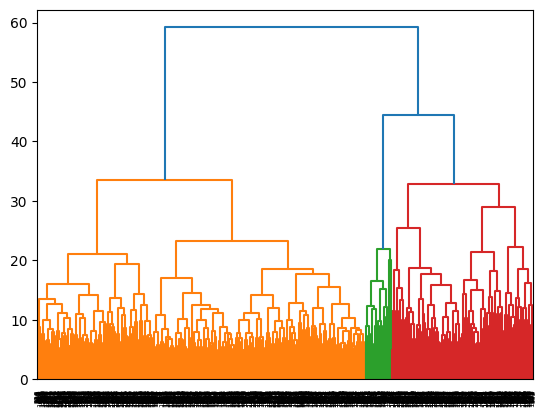

In [127]:
dendrogram = sch.dendrogram(sch.linkage(df, method='complete'))

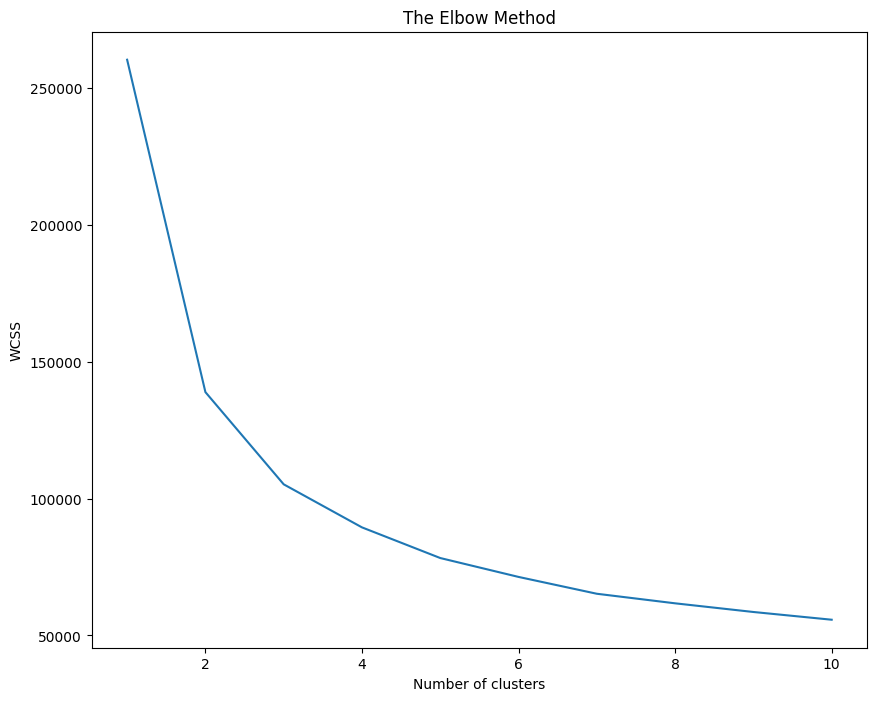

In [128]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [198]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

y_kmeans

array([1, 1, 2, ..., 3, 1, 2], dtype=int32)

In [199]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
data['cluster'] = cluster

In [200]:
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('cluster').mean(),1))
kmeans_mean_cluster
#View all columns without being truncated
pd.set_option('display.max_columns', None)
kmeans_mean_cluster

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
1,48.4,809.2,9.2,3.0,1.0,985.9,2.7,66.4,2.7,3.8,2.7,13943.1,14647.0,3.6,15.0,3.2,2.9,80.0,0.8,25.1,2.7,2.8,13.6,6.5,4.5,6.4
2,46.7,805.6,9.5,3.1,1.0,1038.6,2.7,67.5,2.8,1.8,2.8,5302.3,14245.8,3.6,15.5,3.2,2.7,80.0,0.9,10.0,2.9,2.7,5.1,3.3,1.6,3.3
3,34.9,803.6,9.2,3.0,1.0,1041.1,2.7,65.2,2.7,2.0,2.8,5931.2,14362.0,2.7,15.2,3.2,2.6,80.0,0.8,10.8,2.8,2.8,7.5,5.2,2.4,4.9
4,27.3,795.3,9.0,2.6,1.0,1018.8,2.7,65.7,2.7,1.3,2.7,3475.6,14084.6,1.6,15.2,3.1,2.7,80.0,0.7,4.4,2.8,2.7,3.5,2.1,0.9,2.2


In [201]:
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
1,48.4,809.2,9.2,3.0,1.0,985.9,2.7,66.4,2.7,3.8,2.7,13943.1,14647.0,3.6,15.0,3.2,2.9,80.0,0.8,25.1,2.7,2.8,13.6,6.5,4.5,6.4
2,46.7,805.6,9.5,3.1,1.0,1038.6,2.7,67.5,2.8,1.8,2.8,5302.3,14245.8,3.6,15.5,3.2,2.7,80.0,0.9,10.0,2.9,2.7,5.1,3.3,1.6,3.3
3,34.9,803.6,9.2,3.0,1.0,1041.1,2.7,65.2,2.7,2.0,2.8,5931.2,14362.0,2.7,15.2,3.2,2.6,80.0,0.8,10.8,2.8,2.8,7.5,5.2,2.4,4.9
4,27.3,795.3,9.0,2.6,1.0,1018.8,2.7,65.7,2.7,1.3,2.7,3475.6,14084.6,1.6,15.2,3.1,2.7,80.0,0.7,4.4,2.8,2.7,3.5,2.1,0.9,2.2


In [202]:
cluster1 = data[data['cluster']==1]
cluster2 = data[data['cluster']==2]
cluster3 = data[data['cluster']==3]
cluster4 = data[data['cluster']==4]

In [203]:
cluster1 = cluster1.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','JobInvolvement','OverTime','PercentSalaryHike','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','DailyRate','MonthlyRate','HourlyRate','EnvironmentSatisfaction','JobSatisfaction','PerformanceRating','RelationshipSatisfaction'], axis=1)

cluster1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,cluster
18,53,No,Travel_Rarely,Sales,2,4,Life Sciences,Female,4,Manager,Married,15427,2,0,31,8,1
25,53,No,Travel_Rarely,Research & Development,5,3,Other,Female,5,Manager,Divorced,19094,4,1,26,13,1
28,44,No,Travel_Rarely,Research & Development,7,4,Medical,Female,3,Healthcare Representative,Married,10248,3,1,24,6,1
29,46,No,Travel_Rarely,Sales,2,4,Marketing,Female,5,Manager,Single,18947,3,0,22,2,1
45,41,Yes,Travel_Rarely,Research & Development,12,3,Technical Degree,Female,5,Research Director,Married,19545,1,0,23,15,1


In [204]:
cluster1.describe()
#Only return the mean column
cluster1.describe().iloc[1]

Age                      48.353175
DistanceFromHome          9.210317
Education                 3.027778
JobLevel                  3.781746
MonthlyIncome         13943.111111
NumCompaniesWorked        3.559524
StockOptionLevel          0.753968
TotalWorkingYears        25.111111
YearsInCurrentRole        6.507937
cluster                   1.000000
Name: mean, dtype: float64

In [205]:
cluster1['Attrition'].value_counts()

No     231
Yes     21
Name: Attrition, dtype: int64

In [206]:
cluster1['BusinessTravel'].value_counts()

Travel_Rarely        181
Travel_Frequently     53
Non-Travel            18
Name: BusinessTravel, dtype: int64

In [207]:
cluster1['Department'].value_counts()

Research & Development    172
Sales                      68
Human Resources            12
Name: Department, dtype: int64

In [208]:
cluster1['EducationField'].value_counts()

Life Sciences       104
Medical              87
Marketing            28
Technical Degree     17
Other                10
Human Resources       6
Name: EducationField, dtype: int64

In [209]:
cluster1['Gender'].value_counts()

Male      140
Female    112
Name: Gender, dtype: int64

In [210]:
cluster1['JobRole'].value_counts()

Manager                      89
Research Director            50
Sales Executive              35
Healthcare Representative    29
Manufacturing Director       25
Research Scientist           12
Laboratory Technician        10
Human Resources               1
Sales Representative          1
Name: JobRole, dtype: int64

In [211]:
cluster1['MaritalStatus'].value_counts()

Married     122
Single       69
Divorced     61
Name: MaritalStatus, dtype: int64

In [212]:
cluster2 = cluster2.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','JobInvolvement','OverTime','PercentSalaryHike','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','DailyRate','MonthlyRate','HourlyRate','EnvironmentSatisfaction','JobSatisfaction','PerformanceRating','RelationshipSatisfaction'], axis=1)

cluster2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,cluster
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,Female,2,Sales Executive,Single,5993,8,0,8,4,2
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,Male,2,Research Scientist,Married,5130,1,1,10,7,2
6,59,No,Travel_Rarely,Research & Development,3,3,Medical,Female,1,Laboratory Technician,Married,2670,4,3,12,0,2
27,42,No,Travel_Rarely,Sales,8,4,Marketing,Male,2,Sales Executive,Married,6825,0,1,10,7,2
31,44,No,Travel_Rarely,Research & Development,10,4,Other,Male,2,Healthcare Representative,Married,6465,2,0,9,2,2


In [213]:
cluster2.describe()
#Only return the mean column
cluster2.describe().iloc[1]

Age                     46.675214
DistanceFromHome         9.521368
Education                3.128205
JobLevel                 1.816239
MonthlyIncome         5302.269231
NumCompaniesWorked       3.628205
StockOptionLevel         0.850427
TotalWorkingYears       10.008547
YearsInCurrentRole       3.341880
cluster                  2.000000
Name: mean, dtype: float64

In [214]:
cluster2['Attrition'].value_counts()

No     203
Yes     31
Name: Attrition, dtype: int64

In [215]:
cluster2['BusinessTravel'].value_counts()

Travel_Rarely        166
Travel_Frequently     38
Non-Travel            30
Name: BusinessTravel, dtype: int64

In [216]:
cluster2['Department'].value_counts()

Research & Development    154
Sales                      67
Human Resources            13
Name: Department, dtype: int64

In [217]:
cluster2['EducationField'].value_counts()

Life Sciences       98
Medical             71
Marketing           30
Technical Degree    22
Other               11
Human Resources      2
Name: EducationField, dtype: int64

In [218]:
cluster2['Gender'].value_counts()

Male      144
Female     90
Name: Gender, dtype: int64

In [219]:
cluster2['JobRole'].value_counts()

Sales Executive              56
Research Scientist           51
Laboratory Technician        46
Healthcare Representative    25
Manufacturing Director       24
Human Resources              13
Sales Representative          8
Research Director             6
Manager                       5
Name: JobRole, dtype: int64

In [220]:
cluster2['MaritalStatus'].value_counts()

Married     117
Single       63
Divorced     54
Name: MaritalStatus, dtype: int64

In [221]:
cluster3 = cluster3.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','JobInvolvement','OverTime','PercentSalaryHike','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','DailyRate','MonthlyRate','HourlyRate','EnvironmentSatisfaction','JobSatisfaction','PerformanceRating','RelationshipSatisfaction'], axis=1)

cluster3.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,cluster
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,Male,1,Laboratory Technician,Single,2090,6,0,7,0,3
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,Female,1,Research Scientist,Married,2909,1,0,8,7,3
5,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,Male,1,Laboratory Technician,Single,3068,0,0,8,7,3
8,38,No,Travel_Frequently,Research & Development,23,3,Life Sciences,Male,3,Manufacturing Director,Single,9526,0,0,10,7,3
9,36,No,Travel_Rarely,Research & Development,27,3,Medical,Male,2,Healthcare Representative,Married,5237,6,2,17,7,3


In [222]:
cluster3.describe()
cluster3.describe().iloc[1]

Age                     34.904255
DistanceFromHome         9.195035
Education                3.039007
JobLevel                 1.978723
MonthlyIncome         5931.170213
NumCompaniesWorked       2.712766
StockOptionLevel         0.833333
TotalWorkingYears       10.765957
YearsInCurrentRole       5.168440
cluster                  3.000000
Name: mean, dtype: float64

In [223]:
cluster3['Attrition'].value_counts()

No     495
Yes     69
Name: Attrition, dtype: int64

In [224]:
cluster3['BusinessTravel'].value_counts()

Travel_Rarely        390
Travel_Frequently    110
Non-Travel            64
Name: BusinessTravel, dtype: int64

In [225]:
cluster3['Department'].value_counts()

Research & Development    365
Sales                     179
Human Resources            20
Name: Department, dtype: int64

In [226]:
cluster3['EducationField'].value_counts()

Life Sciences       243
Medical             167
Marketing            63
Technical Degree     45
Other                35
Human Resources      11
Name: EducationField, dtype: int64

In [227]:
cluster3['Gender'].value_counts()

Male      330
Female    234
Name: Gender, dtype: int64

In [228]:
cluster3['JobRole'].value_counts()

Sales Executive              163
Research Scientist           105
Laboratory Technician         93
Manufacturing Director        74
Healthcare Representative     66
Research Director             22
Human Resources               20
Sales Representative          14
Manager                        7
Name: JobRole, dtype: int64

In [229]:
cluster3['MaritalStatus'].value_counts()

Married     256
Single      181
Divorced    127
Name: MaritalStatus, dtype: int64

In [161]:
#df = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','OverTime','PercentSalaryHike','PerformanceRating','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','Attrition','DailyRate','HourlyRate','MonthlyRate'], axis=1)
#df.head()

In [162]:
#def norm_func(i):
#    x = (i-i.min())/(i.max()-i.min())
#    return (x)
#df.DistanceFromHome = norm_func(df.DistanceFromHome)
#df.MonthlyIncome = norm_func(df.MonthlyIncome)

In [163]:
cluster1.describe().iloc[1]
cluster2.describe().iloc[1]
cluster3.describe().iloc[1]

#show above 3 table in one table side by side
from IPython.display import display_html
display_html('<h1>Cluster 1</h1>' + cluster1.describe().iloc[1].to_frame().T.to_html() + '<h1>Cluster 2</h1>' + cluster2.describe().iloc[1].to_frame().T.to_html() + '<h1>Cluster 3</h1>' + cluster3.describe().iloc[1].to_frame().T.to_html(), raw=True)



,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,cluster
mean,28.87224,9.156151,2.687697,1.484227,4206.119874,1.905363,0.764984,5.933754,3.025237,1.0
,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,cluster
mean,49.606742,8.779026,3.074906,3.595506,13159.269663,3.617978,0.76779,24.086142,6.277154,2.0
,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,cluster
mean,39.943761,9.427065,3.087873,1.991213,5938.671353,3.137083,0.838313,11.226714,4.609842,3.0


In [164]:
# Put all the above values side by side in a table to compare all three clusters
from IPython.display import display_html
display_html('<h1>Cluster 1</h1>' + cluster1['Attrition'].value_counts().to_frame().T.to_html() + '<h1>Cluster 2</h1>' + cluster2['Attrition'].value_counts().to_frame().T.to_html() + '<h1>Cluster 3</h1>' + cluster3['Attrition'].value_counts().to_frame().T.to_html(), raw=True)




,No,Yes
Attrition,487,147
,No,Yes
Attrition,243,24
,No,Yes
Attrition,503,66


In [165]:
display_html('<h1>Cluster 1</h1>' + cluster1['BusinessTravel'].value_counts().to_frame().T.to_html() + '<h1>Cluster 2</h1>' + cluster2['BusinessTravel'].value_counts().to_frame().T.to_html() + '<h1>Cluster 3</h1>' + cluster3['BusinessTravel'].value_counts().to_frame().T.to_html(), raw=True)

,Travel_Rarely,Travel_Frequently,Non-Travel
BusinessTravel,446,125,63
,Travel_Rarely,Travel_Frequently,Non-Travel
BusinessTravel,200,46,21
,Travel_Rarely,Travel_Frequently,Non-Travel
BusinessTravel,397,106,66


In [166]:
display_html('<h1>Cluster 1</h1>' + cluster1['Department'].value_counts().to_frame().T.to_html() + '<h1>Cluster 2</h1>' + cluster2['Department'].value_counts().to_frame().T.to_html() + '<h1>Cluster 3</h1>' + cluster3['Department'].value_counts().to_frame().T.to_html(), raw=True)

,Research & Development,Sales,Human Resources
Department,407,203,24
,Research & Development,Sales,Human Resources
Department,176,78,13
,Research & Development,Sales,Human Resources
Department,378,165,26


In [167]:
display_html('<h1>Cluster 1</h1>' + cluster1['EducationField'].value_counts().to_frame().T.to_html() + '<h1>Cluster 2</h1>' + cluster2['EducationField'].value_counts().to_frame().T.to_html() + '<h1>Cluster 3</h1>' + cluster3['EducationField'].value_counts().to_frame().T.to_html(), raw=True)

,Life Sciences,Medical,Marketing,Technical Degree,Other,Human Resources
EducationField,250,209,63,63,38,11
,Life Sciences,Medical,Marketing,Technical Degree,Other,Human Resources
EducationField,106,88,33,24,10,6
,Life Sciences,Medical,Marketing,Technical Degree,Other,Human Resources
EducationField,250,167,63,45,34,10


In [168]:
display_html('<h1>Cluster 1</h1>' + cluster1['Gender'].value_counts().to_frame().T.to_html() + '<h1>Cluster 2</h1>' + cluster2['Gender'].value_counts().to_frame().T.to_html() + '<h1>Cluster 3</h1>' + cluster3['Gender'].value_counts().to_frame().T.to_html(), raw=True)

,Male,Female
Gender,387,247
,Male,Female
Gender,154,113
,Male,Female
Gender,341,228


In [169]:
display_html('<h1>Cluster 1</h1>' + cluster1['JobRole'].value_counts().to_frame().T.to_html() + '<h1>Cluster 2</h1>' + cluster2['JobRole'].value_counts().to_frame().T.to_html() + '<h1>Cluster 3</h1>' + cluster3['JobRole'].value_counts().to_frame().T.to_html(), raw=True)

,Research Scientist,Laboratory Technician,Sales Executive,Sales Representative,Manufacturing Director,Healthcare Representative,Human Resources,Research Director,Manager
JobRole,171,149,137,64,47,29,24,9,4
,Manager,Research Director,Sales Executive,Healthcare Representative,Manufacturing Director,Research Scientist,Laboratory Technician,Sales Representative,Human Resources
JobRole,86,49,42,33,23,16,13,3,2
,Sales Executive,Research Scientist,Laboratory Technician,Manufacturing Director,Healthcare Representative,Human Resources,Research Director,Sales Representative,Manager
JobRole,147,105,97,75,69,26,22,16,12


In [170]:
display_html('<h1>Cluster 1</h1>' + cluster1['MaritalStatus'].value_counts().to_frame().T.to_html() + '<h1>Cluster 2</h1>' + cluster2['MaritalStatus'].value_counts().to_frame().T.to_html() + '<h1>Cluster 3</h1>' + cluster3['MaritalStatus'].value_counts().to_frame().T.to_html(), raw=True)

,Married,Single,Divorced
MaritalStatus,274,230,130
,Married,Single,Divorced
MaritalStatus,134,69,64
,Married,Single,Divorced
MaritalStatus,265,171,133


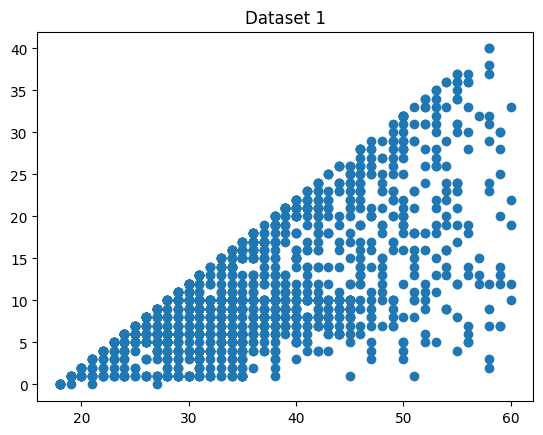

In [173]:
plt.scatter(x = data['Age'], y=data['TotalWorkingYears'])
plt.title('Dataset 1')
plt.show()